In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import libraries
from tensorflow.keras.datasets import mnist
from datetime import datetime

import sys

sys.path.append("C:/Users/bedelman/Documents/GitHub/EdgeTrain")
from edgetrain import (
    dynamic_train,
    log_usage_plot,
    training_history_plot,
    get_edgetrain_folder,
)

from IPython.display import clear_output

clear_output(wait=False)

In [3]:
# Load the MNIST dataset from tensorflow
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(-1, 28, 28, 1).astype("float32") / 255.0
test_images = test_images.reshape(-1, 28, 28, 1).astype("float32") / 255.0
train_dataset = {"images": train_images, "labels": train_labels}

In [19]:
# Create folders for saving
edgetrain_folder = get_edgetrain_folder()
print(f"EdgeTrain folder and subfolders are set up at: {edgetrain_folder}")
print()

# Create log file
log_dir = f"{edgetrain_folder}/logs/"
log_file = f"{log_dir}{datetime.now().strftime('%Y%m%d_%H%M%S')}_resource_usage_log.csv"
print(log_file)

EdgeTrain folder and subfolders are set up at: c:\Users\bedelman\Documents\GitHub\EdgeTrain

c:\Users\bedelman\Documents\GitHub\EdgeTrain/logs/20250210_165940_resource_usage_log.csv


In [20]:
# Perform dynamic training with edgetrain and log resource usage
history_list = dynamic_train(
    train_dataset,
    epochs=20,
    batch_size=32,
    lr=1e-3,
    pruning=0.2,
    log_file=log_file,
    dynamic_adjustments=True,
)
clear_output(wait=False)

In [ ]:
history_list

TypeError: tuple indices must be integers or slices, not str

In [26]:
# View model training history
training_history_plot(history_list, log_file)

TypeError: 'Sequential' object is not subscriptable

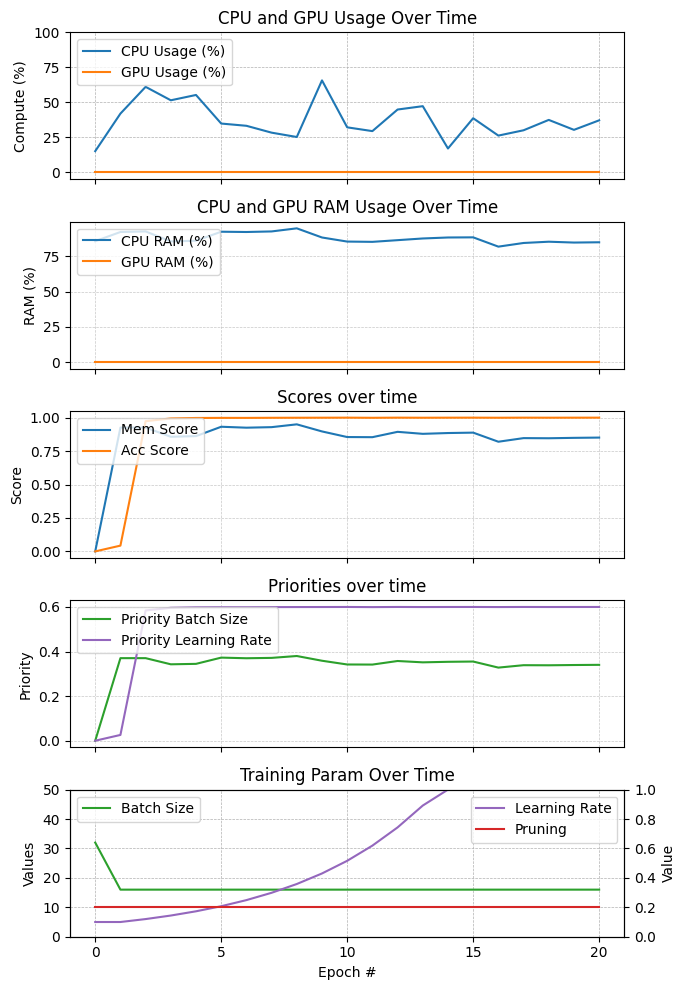

In [27]:
# Visualize resource usage during training
log_usage_plot(log_file)